In [1]:
import tensorflow as tf
import numpy as np
import pylab as plt
print(tf.__version__)

/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorflow/python/framework

1.14.0


/home/volkovskyi/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/volkovskyi/.local/lib/python3.6/site-packages/tensor

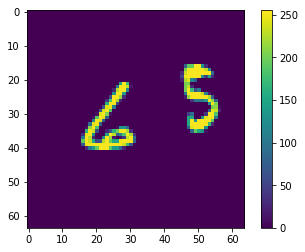

In [2]:
data = np.load("mnist_test_seq.npy")
data = np.swapaxes(data, 0, 1)

num_predicted_frames = 5

data_train_input_enc = data[100:10000, :10, :, :]
data_train_input_dec = data[100:10000, 9:9+num_predicted_frames, :, :]
data_train_output = data[100:10000, 10:10+num_predicted_frames, :, :]

data_test_input_enc = data[0:100, :10, :, :]
data_test_output = data[0:100, 10:10+num_predicted_frames, :, :]
data_test_input_dec = data[0:100, 9:9+num_predicted_frames, :, :]

plt.imshow(data_test_input_enc[4][0])
plt.colorbar()
plt.show()

#Scaling values between -1 and 1
data_train_input_enc = (data_train_input_enc) / 255.0
data_train_input_dec = (data_train_input_dec) / 255.0
data_train_output = (data_train_output) / 255.0
data_test_input_enc = (data_test_input_enc) / 255.0
data_test_input_dec = (data_test_input_dec) / 255.0
data_test_output = (data_test_output) / 255.0

#Adding Channels of dimension 1 IMPORTANT if using CNNs
train_in_enc = np.expand_dims(data_train_input_enc, axis=4)
train_in_dec = np.expand_dims(data_train_input_dec, axis=4)
train_out = np.expand_dims(data_train_output, axis=4)
test_in_enc = np.expand_dims(data_test_input_enc, axis=4)
test_in_dec = np.expand_dims(data_test_input_dec, axis=4)
test_out = np.expand_dims(data_test_output, axis=4)


# output_frames.shape
# output_frames = np.squeeze(output_frames, axis=1)
# test_output_frames = np.squeeze(test_output_frames, axis=1)
# plt.plot(test_output_frames[0])
# plt.show()

# output_frames.shape
# plt.imshow(np.squeeze(test_output_frames[1], axis=2))
# plt.show()

In [3]:
def encoder1(inputs):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3, 3), padding = 'same',
                                    return_sequences=True, return_state=True)
    outputs, state_h, state_c = l1(inputs)
    return outputs, state_h, state_c

def encoder2(inputs):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3, 3), padding = 'same',
                                    return_sequences=True, return_state=True)
    outputs, state_h, state_c = l1(inputs)
    return outputs, state_h, state_c

def encoder3(inputs):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3, 3), padding = 'same',
                                    return_sequences=True, return_state=True)
    outputs, state_h, state_c = l1(inputs)
    return outputs, state_h, state_c


def decoder1(inputs, state_h, state_c):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3,3), padding = 'same', return_sequences=True, return_state = True,
                                   activation='sigmoid')
    outputs, new_state_h, new_state_c = l1(inputs, initial_state = [state_h, state_c])
    return outputs, new_state_h, new_state_c

def decoder2(inputs, state_h, state_c):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3,3), padding = 'same', return_sequences=True, return_state = True)
    outputs, new_state_h, new_state_c = l1(inputs, initial_state = [state_h, state_c])
    return outputs, new_state_h, new_state_c

def decoder3(inputs, state_h, state_c):
    l1 = tf.keras.layers.ConvLSTM2D(filters=1, kernel_size=(3,3), padding = 'same', return_sequences=True, return_state = True)
    outputs, new_state_h, new_state_c = l1(inputs, initial_state = [state_h, state_c])
    return outputs, new_state_h, new_state_c


def model(encoder_inputs, decoder_inputs):
    e1out, e1_h, e1_c = encoder1(encoder_inputs)
    e2out, e2_h, e2_c = encoder2(e1out)
    e3out, e3_h, e3_c = encoder3(e2out)
    
    d3out, d3_h, d3_c = decoder3(decoder_inputs, e3_h, e3_c)
    d2out, d2_h, d2_c = decoder2(d3out, e2_h, e2_c)
    outputs, d1_h, d1_c = decoder1(d2out, e1_h, e1_c)
    
    return outputs, [d3_h,d2_h,d1_h], [d3_c,d2_c,d1_c]

In [ ]:

enc_inputs=tf.placeholder(dtype = tf.float32, shape=[None, 10, 64, 64, 1])
dec_inputs=tf.placeholder(dtype = tf.float32, shape=[None, num_predicted_frames, 64, 64, 1])
ground_truth=tf.placeholder(dtype = tf.float32, shape=[None, num_predicted_frames, 64, 64, 1])


dec_out, d_h, d_c = model(enc_inputs, dec_inputs)

loss = tf.reduce_mean(tf.pow(dec_out - ground_truth, 2))
# for i in range(dec_out.shape[1]):
#     loss += 0.1*(1-tf.reduce_mean(tf.image.ssim(dec_out[:,i,:,:,0], ground_truth[:,i,:,:,0], max_val=1, filter_size=7)))

trainer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)


batch_size = 30
num_epochs = 20

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Starting to run session...
0.034610257


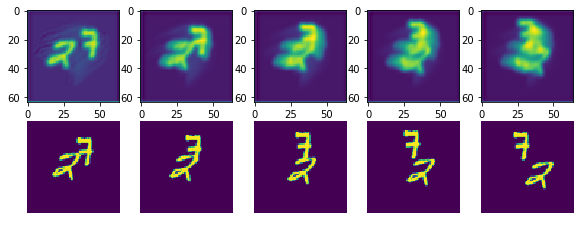

0.0301718


<Figure size 432x288 with 0 Axes>

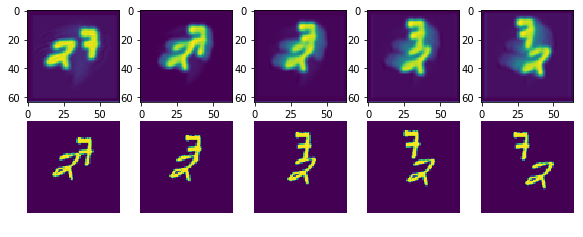

0.028380344


<Figure size 432x288 with 0 Axes>

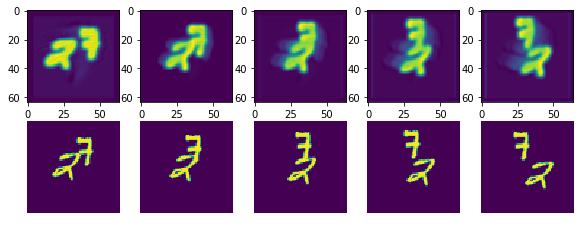

0.027260095


<Figure size 432x288 with 0 Axes>

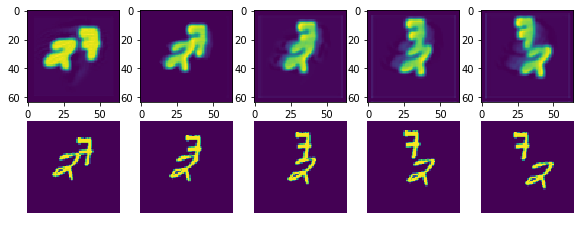

0.026626376


<Figure size 432x288 with 0 Axes>

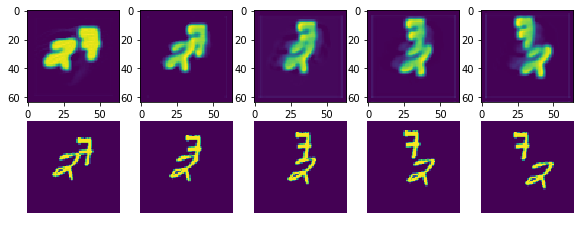

0.026271364


<Figure size 432x288 with 0 Axes>

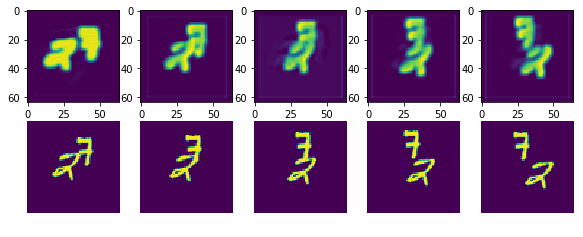

0.026041687


<Figure size 432x288 with 0 Axes>

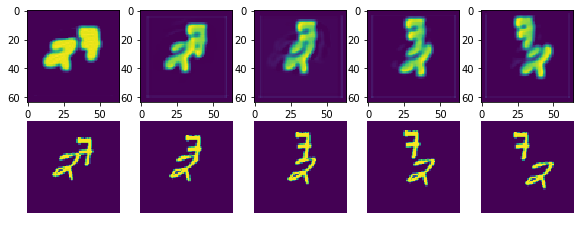

0.025865626


<Figure size 432x288 with 0 Axes>

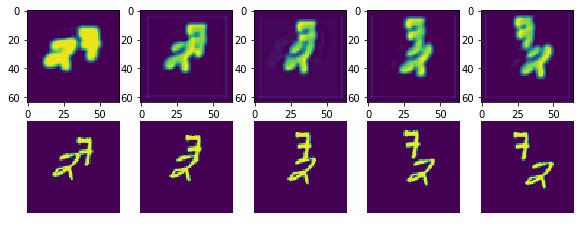

0.025733996


<Figure size 432x288 with 0 Axes>

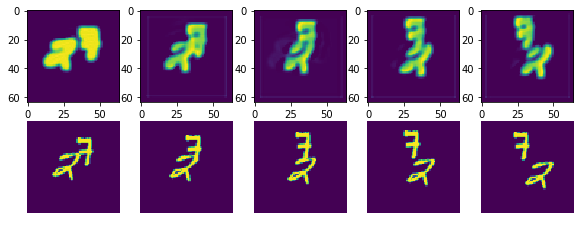

0.025617579


<Figure size 432x288 with 0 Axes>

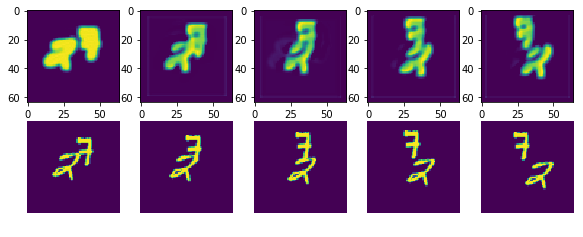

0.025501244


<Figure size 432x288 with 0 Axes>

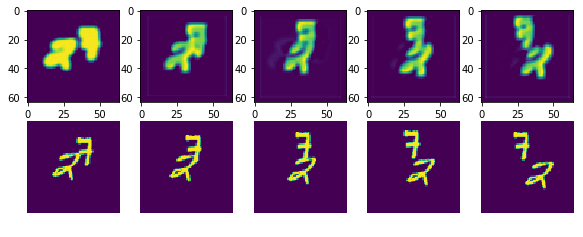

0.025387658


<Figure size 432x288 with 0 Axes>

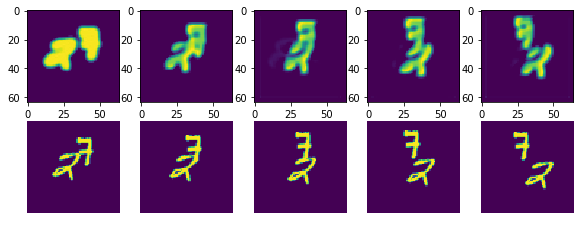

0.025128314


<Figure size 432x288 with 0 Axes>

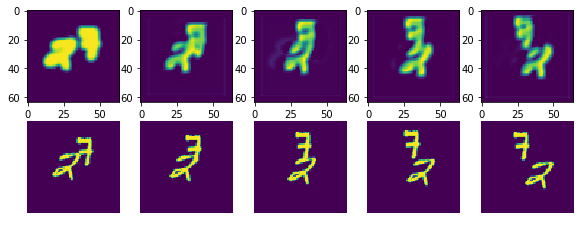

0.024851007


<Figure size 432x288 with 0 Axes>

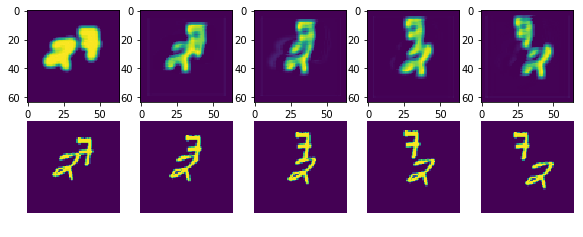

0.024639238


<Figure size 432x288 with 0 Axes>

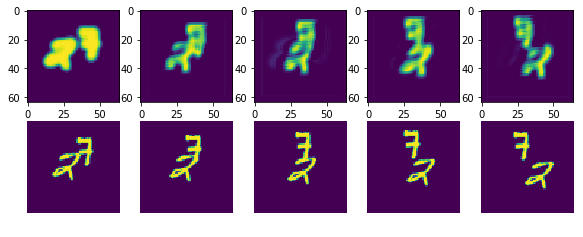

0.025111288


<Figure size 432x288 with 0 Axes>

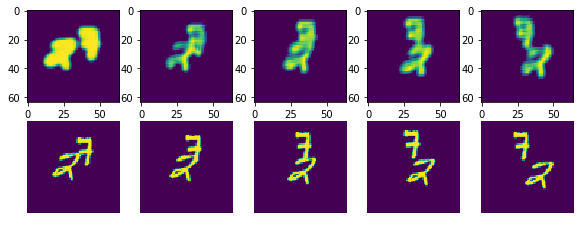

0.024400264


<Figure size 432x288 with 0 Axes>

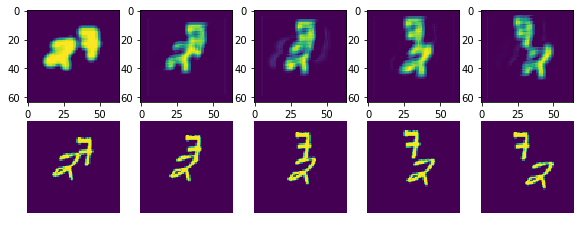

0.024283947


<Figure size 432x288 with 0 Axes>

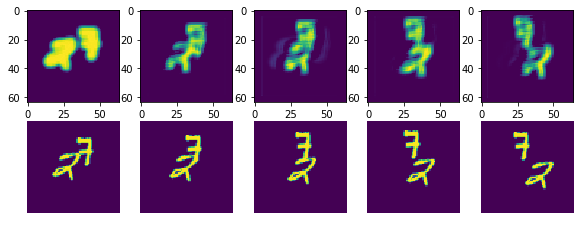

0.024245327


<Figure size 432x288 with 0 Axes>

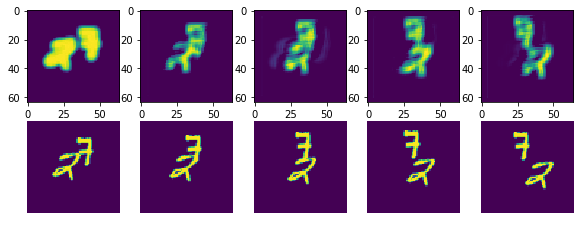

In [ ]:
init=tf.global_variables_initializer()
local_init = tf.local_variables_initializer()
with tf.Session() as sess:
    #each call to sess.run() runs the approriate input within our tf session
    sess.run(init)
    sess.run(local_init)
    print("Starting to run session...")
    for epoch in range(num_epochs): #iterate through each epoch
        for i in range(train_out.shape[0]//batch_size): #iterate through the number of batches we can make from our samples
            batch_enc_in = train_in_enc[i*batch_size:(i+1)*batch_size]
            batch_dec_in = train_in_dec[i*batch_size:(i+1)*batch_size]
            batch_truth = train_out[i*batch_size:(i+1)*batch_size]
            #We have a batch of training images and labels. 
            #Now we need to run the model by inputing these into the place holders we made
            _ = sess.run([trainer], feed_dict={enc_inputs: batch_enc_in, dec_inputs: batch_dec_in, ground_truth: batch_truth})
        #Checking our accuracy each epoch...
        l,out = sess.run([loss, dec_out],
                     feed_dict={enc_inputs: test_in_enc, dec_inputs: test_in_dec, ground_truth: test_out})
        print(l)
        
        actual = test_out[:1, :5]
        predictions = out[:1,:5]
        predictions = predictions.reshape(5, 64, 64)
        actual = actual.reshape(5, 64, 64)
        plt.figure(figsize=(20, 20))
        for i in range(predictions.shape[0]):
            plt.subplot(10, 10, i+1)
            plt.imshow(predictions[i], interpolation='nearest')
            plt.subplot(10, 10, 10+i+1)
            plt.imshow(actual[i], interpolation='nearest')
            plt.axis('off')
        plt.show()
        plt.tight_layout()

In [ ]:
state_c.shape

In [ ]:
ground_truth = test_out[:1, :5]
predictions = test_out[:1,:5]
predictions = predictions.reshape(5, 64, 64)
ground_truth = ground_truth.reshape(5, 64, 64)
plt.figure(figsize=(20, 20))
for i in range(predictions.shape[0]):
    plt.subplot(10, 10, i+1)
    plt.imshow(predictions[i], interpolation='nearest')
    plt.subplot(10, 10, 10+i+1)
    plt.imshow(ground_truth[i], interpolation='nearest')
    plt.axis('off')
plt.show()
plt.tight_layout()

In [6]:
dec_out.shape

TensorShape([Dimension(None), Dimension(5), Dimension(64), Dimension(64), Dimension(1)])

In [10]:
.shape

TensorShape([Dimension(None), Dimension(64), Dimension(64)])